In [4]:
import lvm_read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from sympy import I, Eq, Abs, N
from numpy import pi
from scipy.optimize import curve_fit

In [5]:
R_W, R_T, R_L = symbols('R_W R_T R_L', real=True)
L, C, w, V_0, t = symbols('L C \omega V_0 t', real=True)
V = V_0*exp(I*w*t)

In [6]:
Z_T = R_T + 1/(C*w*I)
Z_W = R_W + R_L + L*w*I
Z_eq = 1/(1/Z_T+1/Z_W)
Z_tot = Z_eq
i = V / Z_tot
V_eq = i * Z_eq
i_T = V_eq / Z_T
i_W = V_eq / Z_W
V_T = simplify(i_T*R_T)
V_W = simplify(i_W*R_W)

In [9]:
V_T

C*R_T*V_0*\omega*exp(I*\omega*t)/(C*R_T*\omega - I)

crossover_frequency = 


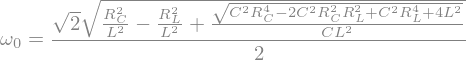

In [4]:
crossover_w = (solve(Eq(Abs(Z_T), Abs(Z_W)), w))[3] # 4 solutions: the last is positive and real
crossover_freq = crossover_w / (2*pi)
print('crossover_pulse = ')
Eq(Symbol('\omega_0'), crossover_w)

In [8]:
A_T = V_T / exp(I*w*t)
pseudo_phi_T = im(A_T)/re(A_T)
phi_T = atan(pseudo_phi_T)
print('tweeter phase = ')
Eq(Symbol('\phi_T'), phi_T)


tweeter phase = 


Eq(\phi_T, atan(1/(C*R_T*\omega)))

woofer phase = 


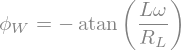

In [9]:
A_W = V_W / exp(I*w*t)
pseudo_phi_W = im(A_W)/re(A_W)
phi_W = atan(pseudo_phi_W)
print('woofer phase = ')
Eq(Symbol('\phi_W'), phi_W)

phase match pulse = 


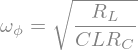

In [11]:
phase_match_w = (solve(Eq(pseudo_phi_T, -pseudo_phi_W), w))[1] # 2 solutions: the last is positive
print('phase match pulse = ')
Eq(Symbol('\omega_\phi'), phase_match_w)